<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>Howdy!</title>
  </head>
  <body>
    <pre>
Name:         Mohammad Hasan
Course:       ECGR 4105 Intro. ML
Date:         03/31/2025
Assignment:   03
Semester:     Spring 2025
Instructor:   Dr. Deeba
Institution:  UNC Charlotte
    </pre>
  </body>
</html>


<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>Problem 1: I & II</title>
  </head>
  <body>
    <pre>
In this homework, we will use the Cancer dataset.
Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.
Problem 1 (25pts):
(i) ( 7.5+2.5+2.5 points) Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign).
First, create a logistic regression that takes all 30 input features for classification.
Use 80% and 20% split between training and evaluation (test).
Make sure to perform proper scaling and standardization before your training.  
Also, report your results, including accuracy, precision, and recall. Plot the confusion matrix representing your binary classifier.
(ii) (7.5+2.5+2.5 points) How about adding a weight penalty here, considering the number of parameters?
Add the weight penalty and repeat the training and report the results.
    </pre>
  </body>
</html>

In [2]:
# 1. Import libs
import pandas as pd

#2. loading dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target


(569, 30)


In [3]:
breast_input = pd.DataFrame(X)
breast_input.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Confusion Matrix:
 [[45  2]
 [ 2 65]]


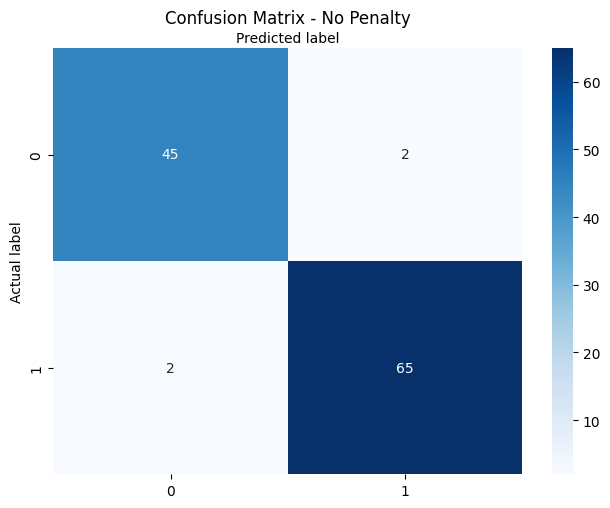

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Split the dataset (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 4. Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)  # Note: Only transform test set!

# 5. Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

# 6. Predict the test set results
Y_pred = classifier.predict(X_test)

# 7. Evaluate the model: Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

cnf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cnf_matrix)

# 8. Visualize the Confusion Matrix
class_names = [0,1]  # 0 = malignant, 1 = benign
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - No Penalty')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [5]:
# 9. Accuracy, Precision, and Recall
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Confusion Matrix with Penalty:
 [[45  2]
 [ 2 65]]


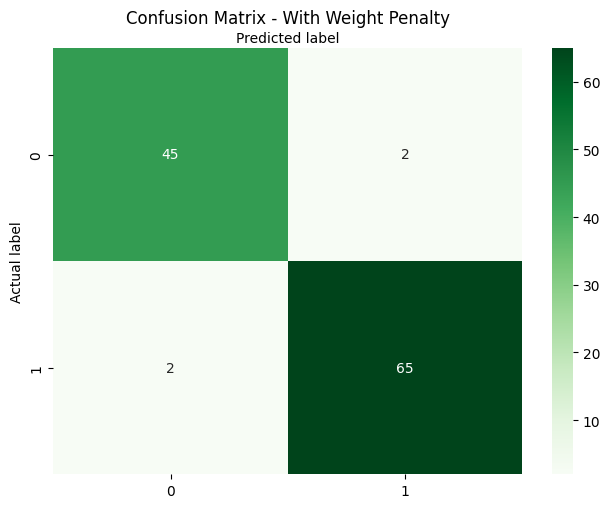

Accuracy (with penalty): 0.9649122807017544
Precision (with penalty): 0.9701492537313433
Recall (with penalty): 0.9701492537313433


In [6]:
# P1.II

# 1. Train Logistic Regression with penalty (Regularization)
classifier_penalty = LogisticRegression(random_state=0, penalty='l2', C=1.0)  # C is inverse of regularization strength
classifier_penalty.fit(X_train, Y_train)

# 2. Predict the test set results
Y_pred_penalty = classifier_penalty.predict(X_test)

# 3. Evaluate the model: Confusion Matrix
cnf_matrix_penalty = confusion_matrix(Y_test, Y_pred_penalty)
print("Confusion Matrix with Penalty:\n", cnf_matrix_penalty)

# 4. Visualize the Confusion Matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_penalty), annot=True, cmap="Greens", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - With Weight Penalty')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# 5. Accuracy, Precision, and Recall
print("Accuracy (with penalty):", accuracy_score(Y_test, Y_pred_penalty))
print("Precision (with penalty):", precision_score(Y_test, Y_pred_penalty))
print("Recall (with penalty):", recall_score(Y_test, Y_pred_penalty))


<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>Problem 2: I & II</title>
  </head>
  <body>
    <pre>
(i) (13 points) Use the cancer dataset to build a naive Bayesian model to
classify the type of cancer (Malignant vs. benign).
Use 80% and 20% split between training and evaluation (test).
(ii) (7+5) Plot your classification accuracy, precision, recall, and F1 score.
Explain and elaborate on your results, comparing your results against the
logistic regression classifier you did in Problem 1.
    </pre>
  </body>
</html>

Confusion Matrix:
 [[42  5]
 [ 6 61]]


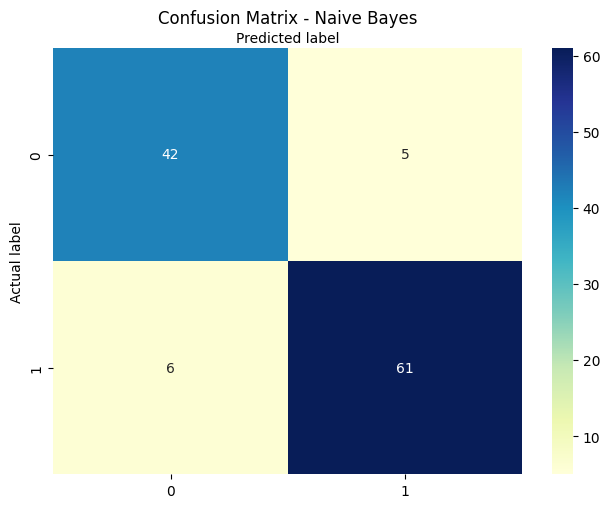

Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


In [7]:
#1. loading libs
# alr done in P1

# 2. Load the Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
Y = breast.target

# 3. Split into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 4. Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 5. Train Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# 6. Predict Test Set Results
Y_pred = classifier.predict(X_test)

# 7. Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cnf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cnf_matrix)

# 8. Visualize Confusion Matrix
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# 9. Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

<ipython-input-9-9adfc50f091f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_names, y=metrics_list, palette="viridis")


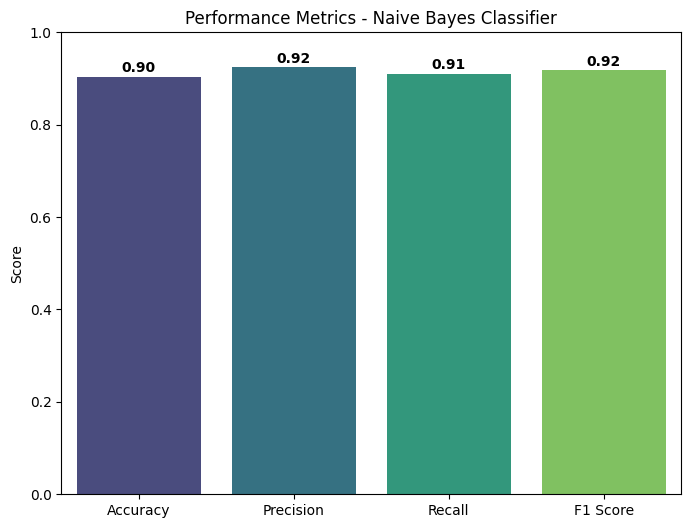

In [9]:
# P2. II

# Plot Accuracy, Precision, Recall, F1 Score

metrics_list = [accuracy, precision, recall, f1]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8,6))
sns.barplot(x=metrics_names, y=metrics_list, palette="viridis")
plt.title('Performance Metrics - Naive Bayes Classifier')
plt.ylim(0,1)
for i, v in enumerate(metrics_list):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.ylabel('Score')
plt.show()


<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>Problem 3: I & II</title>
  </head>
  <body>
    <pre>
(i) (13 points) Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign).  
Use 80% and 20% split between training and evaluation (test).
(ii) (7+5) Plot your classification accuracy, precision, recall, and F1 score.
Explain and elaborate on your results, comparing your results against the  classifiers you did in Problem 1 and 2.
You can modify your Naive Bayes Classifier by writing the following:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=1.0)
    </pre>
  </body>
</html>

Confusion Matrix:
 [[46  1]
 [ 1 66]]


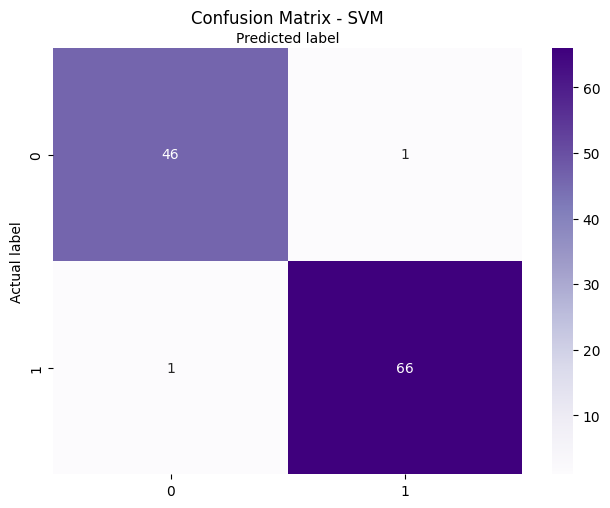

Accuracy: 0.9824561403508771
Precision: 0.9850746268656716
Recall: 0.9850746268656716
F1 Score: 0.9850746268656716


In [10]:
# 1. import libs - alr done

# 2. Load the Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
Y = breast.target

# 3. Split into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 4. Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 5. Train SVM Classifier
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=1.0, random_state=0)
classifier.fit(X_train, Y_train)

# 6. Predict Test Set Results
Y_pred = classifier.predict(X_test)

# 7. Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cnf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cnf_matrix)

# 8. Visualize Confusion Matrix
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Purples", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# 9. Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

<ipython-input-12-b78617bbab4c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_names, y=metrics_list, palette="magma")


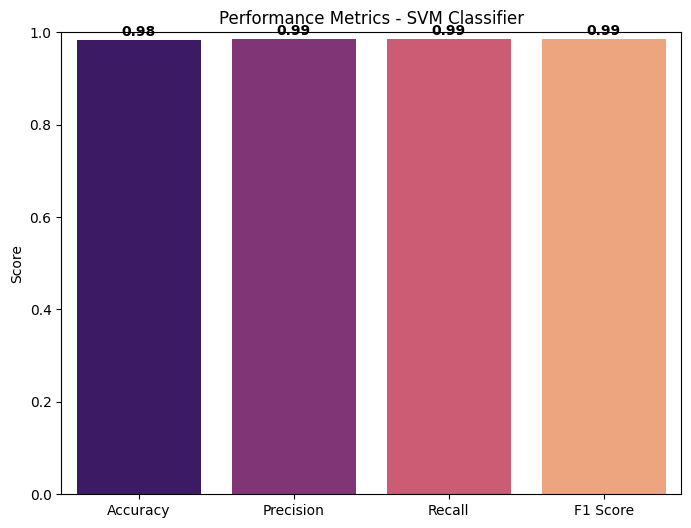

In [12]:
# Plot Accuracy, Precision, Recall, F1 Score

metrics_list = [accuracy, precision, recall, f1]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8,6))
sns.barplot(x=metrics_names, y=metrics_list, palette="magma")
plt.title('Performance Metrics - SVM Classifier')
plt.ylim(0,1)
for i, v in enumerate(metrics_list):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.ylabel('Score')
plt.show()



<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>Problem 4</title>
  </head>
  <body>
    <pre>
(15 points) Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign).
Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).
Identify the optimum number of K, principal components that achieve the highest classification accuracy.
(5 + 5 points) Plot your classification accuracy, precision, recall, and F1 score over a different number of Ks.
Explain and elaborate on your results and compare them against problems 1 and 2.
    </pre>
  </body>
</html>

In [14]:
# 1. loading libs

# 2. Load the Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
Y = breast.target

# 3. Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 5. Try Different Numbers of Principal Components
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
components = list(range(1, X.shape[1] + 1))  # 1 to 30

for k in components:
    # Apply PCA
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_scaled)

    # Split into Train and Test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

    # Train Logistic Regression
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, Y_train)

    # Predict
    Y_pred = classifier.predict(X_test)

    # Calculate Metrics
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

# Find best K
best_k = components[np.argmax(accuracy_list)]
print(f"Best K (number of principal components) for highest accuracy: {best_k}")

Best K (number of principal components) for highest accuracy: 11


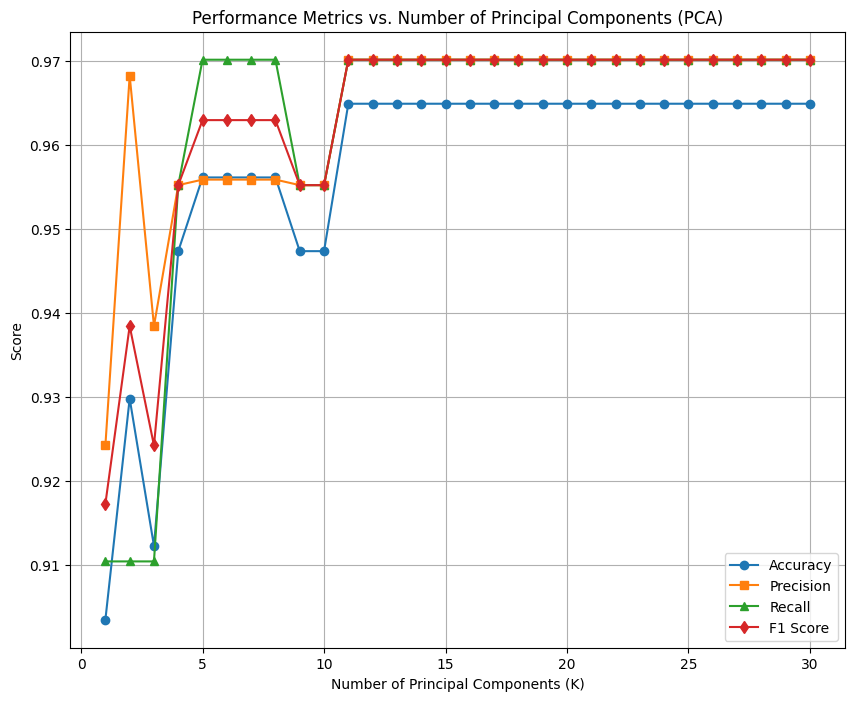

In [15]:
# Plot Accuracy, Precision, Recall, F1 Score over Different Ks
plt.figure(figsize=(10,8))

plt.plot(components, accuracy_list, marker='o', label='Accuracy')
plt.plot(components, precision_list, marker='s', label='Precision')
plt.plot(components, recall_list, marker='^', label='Recall')
plt.plot(components, f1_list, marker='d', label='F1 Score')

plt.title('Performance Metrics vs. Number of Principal Components (PCA)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
